# Optimal Bet Size Calculator

- Hello everyone, my name is Danny Stein and Jonah asked me a while ago to figure out what would would be the optimal bet size that would maximize long-term wealth. I uncovered a white paper that reviews derivation the Kelly Criterion based on what Ed Thorp found.

- The goal of a sport's gambler is to maximize the expected value of wealth after N rounds. This means the size of your units *must be optimized* or else you will definitely lose in the long-run, which is  exactly what happens to 95% of gamblers. Majority of people gamble just because it is fun, the type of attitude you need if you know it's a lose-lose situation.  

# Derivation of Optimal Fraction of Bet Size



- Based on Jonah's model we have obtained the probability of successes based on the absolute spread differences of his model.
- If we believe these are true, and that they are, then he is giving you an edge based on what the market is giving you at a certain time. 
- For example if Jonah's model predicts that UIUC has an absolute difference of $4$ against what the Market is giving you, he believes that his model's prediction is large enough from the market, then it is worth betting on. 

## Assumptions

1. The probability of winning the bet is known $\frac{1}{2}<p<1$ and the probability of a loss is $q = 1-p$, and each bet is independent of each other. 
2. Let $f$ represent the fraction of captial on each bet $0<f<1$. Additionally, $W_{n}$ and $L_{n}$ represent the number of wins and losses after $n$ bets, respectively. 

3. In the market we never really get an **even payoff** which is just a line that is $\pm 100$. Generally we consider a scenario that **b** units are won per unit bet per win and **a** units are lost per unit bet per loss. For example if the market gives UIUC -110, the b = 1 units and a = 1.1 units. The opposite is true if UIUC is -110. 

### Derivation of optimal bet size

- Given inital capital of $X_{0}$ or your bankroll after n bets, your initial captial equals:

$X_{n} = X_{0}(1-af)^{L_{n}}(1+bf)^{W_{n}}$

- In this context, long-term wealth comes down to maximizing the average **geometric growth rate per bet.**

$g(f) = ln(\frac{X_n}{X_0})^{1/n}  = \frac{1}{n} (L_n ln(1-af) + W_nln(1+bf))$

- The expected value of $g(f)$ is:

$G(f) = \mathbb{E}g(f) = qln(1-af)+pln(1+bf)$

- We want to maximize $G(f)$ so that that the expected average growth rate of capital is maximized by choosing $f$ optimally. All this entails is by taking the first derivative of $\mathbb{E}g(f)$ with respect to **f** - the optimal bet size. 

$\frac{\mathrm d}{\mathrm d f} \big(g(f)) = \frac{-qa}{1-af} + \frac{pb}{1+bf} = 0$

$\frac{pb}{1+bf} = \frac{qa}{1-af}$

$pb(1-af) = qa(1+bf)$

$pb - pbaf = qa +qabf$

$qabf + pbaf = pb -aq$

$fab(q+p) = pb-qa$

- Since we know that **q+p = 1, f becomes**

$\therefore f = \frac{pb-qa}{ab}$



$f = \frac{pb-qa}{ab}$


# Interpretation of $f = \frac{pb-qa}{ab}$

**Example:** Let's say UIUC is playing Michigan at home and Vegas (the market) has UIUC -1, yet Jonah's model predicts UIUC's spread to be -7 which would give us an absolute difference of 6 from the market. Historically, Jonah's model gives us a 56% chance of hitting if the difference between his line and the market's absolute difference is 6. Right now the market for UIUC is favored by (-1) and -110. 
This means you need to **risk** $110 to win $100. Thus, b = 1 (b represents unit that are won per unit bet per win) and a = 1.1 ( a represents units that are lost per unit bet per loss.)

Plugging p = .56, q = .44, a = 1, and b = 1.1, we calculate that $f = .07/1.1 = 0.0690$. Rather 6.909% of your bankroll that night should be allocated to this bet according to the assumptions given above. 

- **Jonah's model is not actually 56% right, if it was that would be incredibly insane given how hard it is to find that extra alpha.**
- Right now he is 53.12% right on predicting totals and around 52.5% right on predicting spreads, something that would be expected and indicates how the betting market is incredibly efficient. Theoretically speaking, lines that are -110 should never be bet unless Jonah's model accuracy is $>52.380$%. 
    - Why?
    
    Because in a risk-neutral world your **expected payoff is always 0.** A line that is -110 implies a risk-neutral probability of $52.38$% of happening. However, if you have a model that says **nooo** actually the probability **of that event occuring is 54%** then it would be appropriate to bet on that game with an appropriate allocation. **Never bet more than you should**.


Rememeber this number maximizes your wealth **in the long-run** so I recommend that you should never bet greater than percentage based on a probabilitic and mathematical basis, and remember it is always better to be conservative than aggressive, so some people would divide that 6.909% by one-half and bet that amount. 


# Simulations of Optimal Allocation

In [1]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
%matplotlib inline
np.random.seed(100)

In [2]:
p = .56
f = ((.56)-.44*(1.1))/1.1 # optimal fraction of wealth to be invested
I = 50
n = 200

In [4]:
def simulation(f_):
    c = np.zeros((n,I)) # 200 trials per series simulated- there will be 50 seriess
    c[0] = 100 # initial wealth is $100
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1,p)
            if o > 0:
                c[t,i] = (1+f)*c[t-1,i]
            else:
                c[t,i] = (1-f*(1.1))*c[t-1,i]
    return c
        

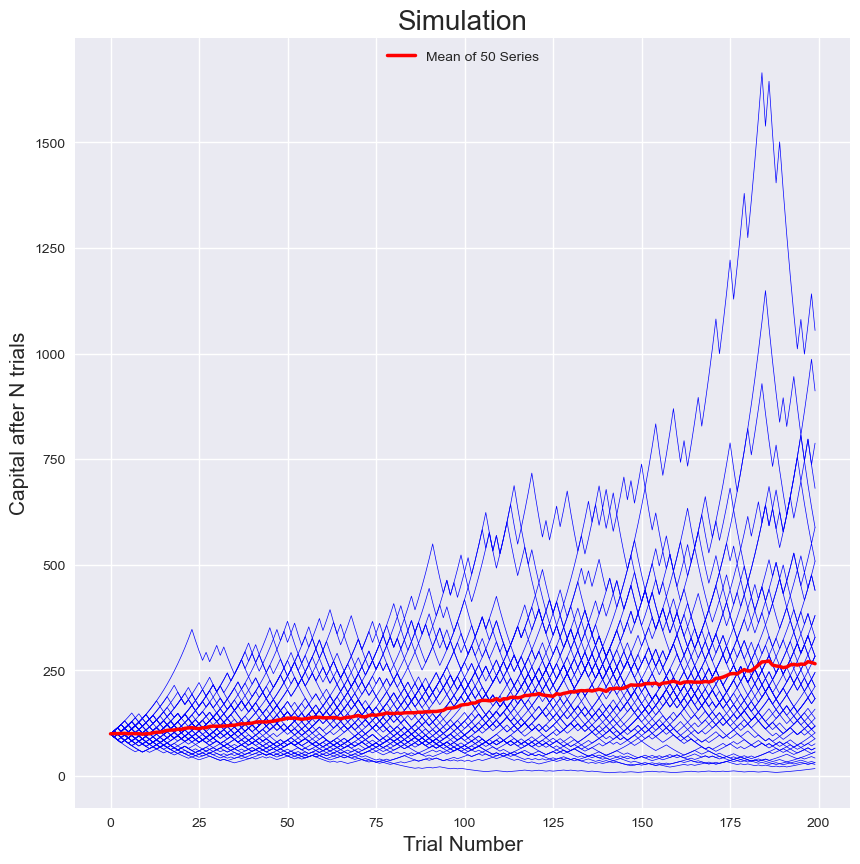

In [5]:
c_1 = simulation(f)
plt.figure(figsize = (10,10))
plt.plot(c_1,'b',lw =0.5)
plt.plot(c_1.mean(axis =1), 'r', lw =2.5, label = 'Mean of 50 Series')
plt.ylabel('Capital after N trials', size = 15)
plt.title('Simulation', size = 20)
plt.xlabel('Trial Number', size = 15)
plt.legend(loc = 'upper center')

In [6]:
print(f'Mean {c_1.mean(axis = 1).mean()}, Standard Deviation {c_1.std(axis = 1).mean()}')

Mean 173.55056003118122, Standard Deviation 117.12454602285813


In [ ]:
f

- As you can see the **red line** is the mean of all the 50 series and it does gradually increase in the long-run. The mean over all the 50 series is $169 ( remember inital capital is $10) with a standard deviation of $63.57. We can see that there is a lot of variance, but this is expected with betting.




# Simulation with different allocations

- Here I want to simulate for different values of f and plot the mean over the 50 series against time. 

- In our example above, we calculated $f^* = 0.0609$.
- In this next example, I am going to make f equal to .02, .1, .25, .5, and .8

In [17]:

c_1 = simulation(f)
c_005 = simulation(.02)
c_008 = simulation(.1)
c_025 = simulation(.25)
c_05 = simulation(.5)
c_08 = simulation(.8)

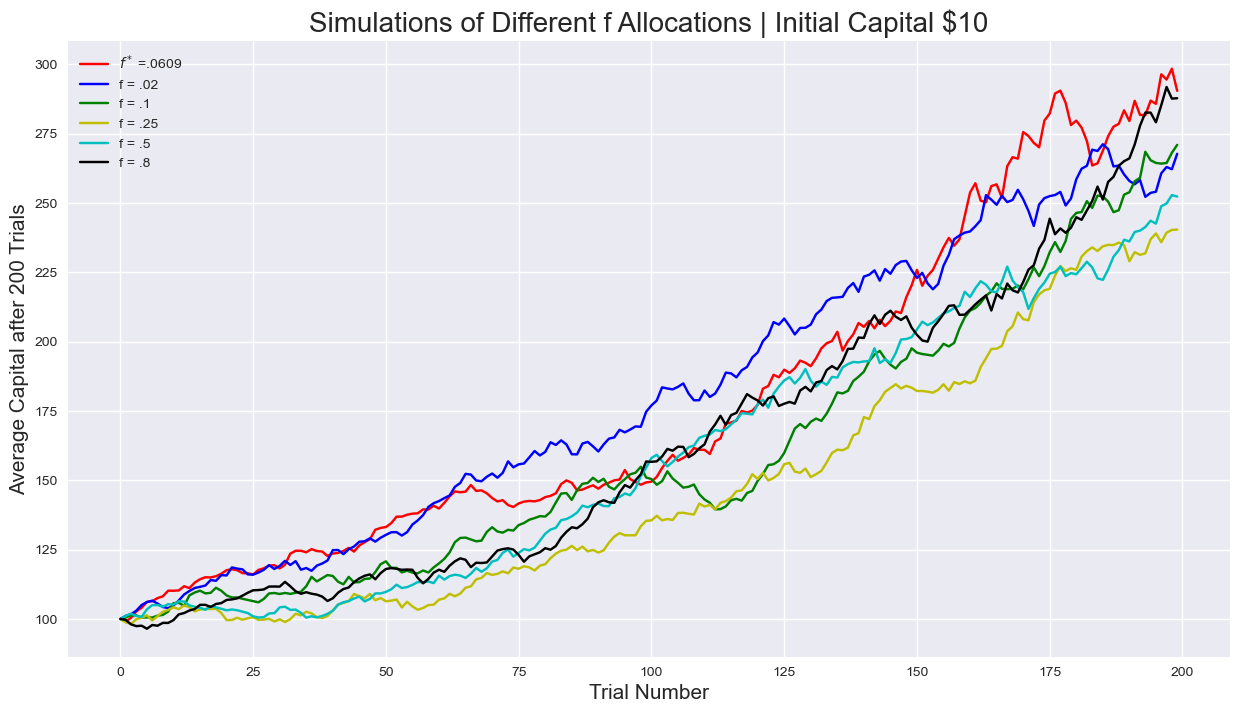

In [18]:
plt.figure(figsize = (15,8))
plt.plot(c_1.mean(axis = 1), c = 'r', label = '$f^*$ =.0609')
plt.plot(c_005.mean(axis = 1), c ='b', label = 'f = .02')
plt.plot(c_008.mean(axis =1), c = 'g', label = 'f = .1')
plt.plot(c_025.mean(axis = 1), c ='y', label = 'f = .25')
plt.plot(c_05.mean(axis = 1), c = 'c', label = 'f = .5')
plt.plot(c_08.mean(axis = 1), c = 'k', label = 'f = .8')
plt.ylabel('Average Capital after 200 Trials', size = 15)
plt.xlabel('Trial Number', size = 15)
plt.title('Simulations of Different f Allocations | Initial Capital $10', size= 20)
plt.legend(loc = 0)

In [9]:
series = pd.DataFrame([(c_1.mean(axis = 1)).mean(), (c_005.mean(axis = 1)).mean(),(c_008.mean(axis =1)).mean(), (c_025.mean(axis = 1)).mean(), (c_05.mean(axis = 1)).mean(), (c_08.mean(axis = 1)).mean()], index = ['f = .0609', 'f = .02','f =.1','f = .25','f = .5', 'f = .8'], columns = ['Mean Captial after N Trials'])


In [10]:
vol = pd.DataFrame([(c_1.std(axis = 1)).mean(), (c_005.std(axis = 1)).mean(),(c_008.std(axis = 1)).mean(), (c_025.std(axis =1)).mean(), (c_05.std(axis =1)).mean(), (c_08.std(axis = 1)).mean()], index = ['f = .0609', 'f = .02','f =.1','f = .25','f = .5', 'f = .8'], columns = ['Vol of f'])

In [11]:
series = series.join(vol, how = 'inner')
series['Mean Per Vol'] = series['Mean Captial after N Trials']/series['Vol of f']


In [12]:
series

,Mean Captial after N Trials,Vol of f,Mean Per Vol
f = .0609,173.848509,169.210929,1.027407
f = .02,183.564019,151.779684,1.209411
f =.1,175.260462,128.036794,1.368829
f = .25,174.718319,184.746551,0.945719
f = .5,156.924323,118.831018,1.320567
f = .8,149.849082,116.945092,1.281363


- Remember this is just one simulation. Sometimes, other allocations will do better simply because of better luck, but in an infinite amount of time, the optimal allocation derived by Ed Thorp is the best one theoretically. What we have accomplished is maximizing the expected value of wealth across time based on the empirical probabilities that Jonah's model has predicted. 
- I have ran the simulation with no set.seed() and sometimes the optimal allocation does fail, but there is nothing you can do to change that! Gambling is gambling!

- Based on the value of f calculated, I would recommend that you never bet higher than what f calculates, if anything, bet smaller than that amount. 
